In [2]:
#install seaborn
!pip install seaborn

     -------------------------------------- 294.6/294.6 kB 4.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#importar bibliotecas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#cargar los datos
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [5]:
#modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'SVC': SVC(), #Maquinas de soporte vectorial
    'Decision Tree': DecisionTreeClassifier()
}

Logistic Regression trained.
Logistic Regression predicted.
Accuracy:  1.0
Recall:  1.0
Precision:  1.0
F1:  1.0
Cross validation:  0.9733333333333334


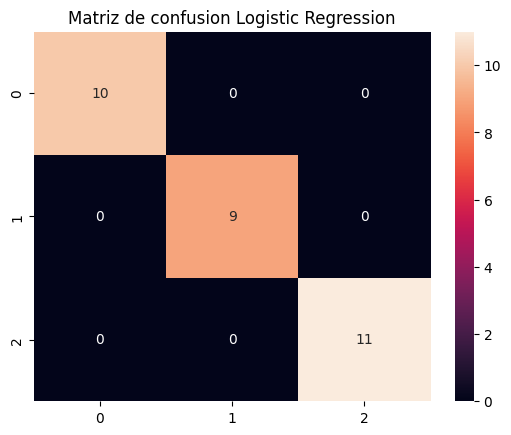

SVC trained.
SVC predicted.
Accuracy:  1.0
Recall:  1.0
Precision:  1.0
F1:  1.0
Cross validation:  0.9666666666666666


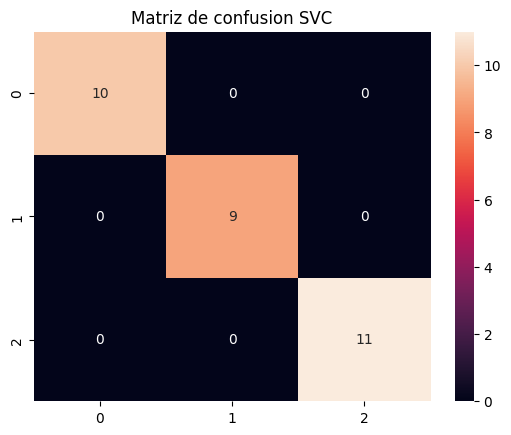

Decision Tree trained.
Decision Tree predicted.
Accuracy:  1.0
Recall:  1.0
Precision:  1.0
F1:  1.0
Cross validation:  0.9666666666666668


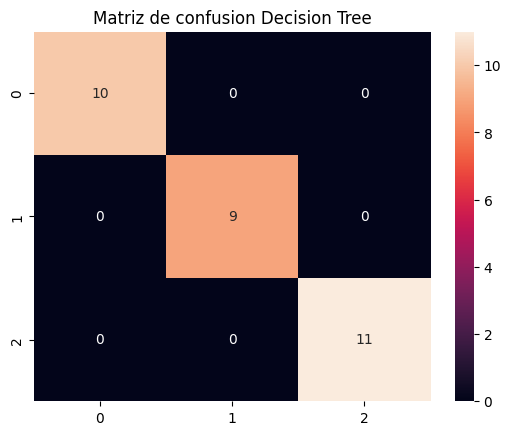

In [6]:
#evalucion de los modelos
for name, model in models.items():
    #Entrenamiento
    model.fit(X_train, y_train)
    print(name + ' trained.')

    #Prediccion
    y_pred = model.predict(X_test)
    print(name + ' predicted.')

    #Evaluacion
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Recall: ', recall_score(y_test, y_pred, average='macro'))
    print('Precision: ', precision_score(y_test, y_pred, average='macro'))
    print('F1: ', f1_score(y_test, y_pred, average='macro'))

    #cross validation
    scores = cross_val_score(model, X, y, cv=5)
    print('Cross validation: ', scores.mean())

    #Matriz de confusion
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True)
    plt.title(f"Matriz de confusion {name}")
    plt.show()
